<a href="https://colab.research.google.com/github/gneto1999/Gaussian-Elimination-with-Partial-Pivoting/blob/main/IE_T1_Gilmar_Santos_Neto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Teorema do Limite Central

Nesta parte, você irá realizar uma simulação computacional envolvendo a
distribuição exponencial e o Teorema do Limite Central.
A função de densidade de uma variável aleatória que segue a distribuição
exponencial é a seguinte:
$$f(x, \lambda)= \begin{cases}
   \lambda e^{-(\lambda e)} &\text{} x\geq 0 \\
   0 &\text{} x< 0
\end{cases}$$
Na função acima, λ é o parâmetro da distribuição exponencial, conhecido
como taxa (rate). A média da distribuição exponencial é 1/λ e o desvio
padrão é também 1/λ.
A geração de números aleatórios que seguem a distribuição exponencial
pode ser simulada tanto em R quanto em Python; veja a Listagem 1 e a
Listagem 2. Nessas duas listagens considere o seguinte:

* lambda indica o parâmetro da distribuição exponencial;
* n indica a quantidade de valores a gerar.

Listagem 1: Geração de números aleatórios seguindo a distribuição exponencial em R.

`amostra = rexp (n , rate = lambda )`

Listagem 2: Geração de n números aleatórios seguindo a distribuição exponencial em Python.

`from scipy.stats import expon`

`amostra = expon.rvs (size = n , scale =1/ lambda)`

Em sua investigação, defina o valor de lambda como igual a 0,2 para
todas as simulações que você realizar. Sua investigação deve abranger a
distribuição de médias de 40 exponenciais i.e., o tamanho de suas amostras
deve ser n = 40). Além disso, sua investigação deve usar 1000 simulações
(i.e., a quantidade de amostras deve ser igual a 1000).

Apresente um histograma da distribuição amostral para a variável x, a
média amostral (sampling distribution of the mean). Construa esse histograma usando os dados resultantes das 1000 simulações. O gráfico que você
deve produzir deve ser semelhante ao apresentado na Figura 1. Como sugestão, use ou a biblioteca matplotlib(para a linguagem Python) ou a biblioteca ggplot(para a linguagem R) para produzir esse gráfico. Repareque, assim como a figura abaixo, seu gráfico deve mostrar que a distribuição
amostral é aproximadamente normal.
Agora, calcule a média e variância aproximadas para a variável x e use
o TLC para obter aproximações para a média e a variância da população
subjacente. Os valores que você obteve são próximos aos valores teóricos?
Explique.

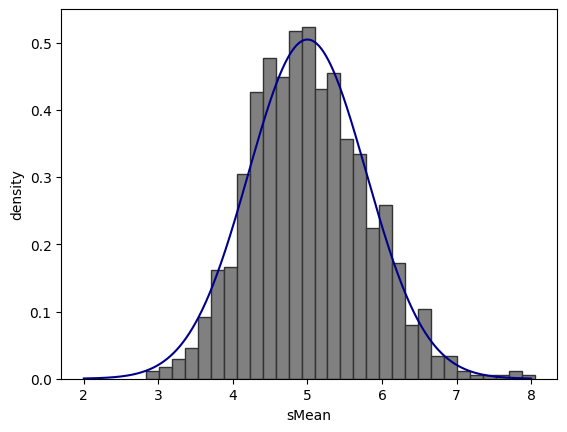

Média populacional e Variância populacional estimados com TLC
u = 5.024378285822497 o^2 = 24.248485620222038
5.0 24.999999999999996


In [ ]:
from scipy.stats import expon
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot

ig, ax = pyplot.subplots()

n = 40
lamb = 0.2
exp_mean = 1/lamb;
exp_var = 1/(lamb**2);
exp_std_clt = (1/lamb)/np.sqrt(n);
qtd_amostras = 1000

means = [np.mean(expon.rvs(size = n, scale = exp_mean)) for _ in range(qtd_amostras)]

normal_values = np.linspace(2, 8, 1000)

pyplot.plot(normal_values, norm.pdf(normal_values, scale = exp_std_clt, loc = exp_mean), color = "darkblue")
pyplot.hist(means, density = True, bins = 30, color = "gray", edgecolor="#333")

pyplot.ylabel("density")
pyplot.xlabel("sMean")
pyplot.show()

print("Média populacional e Variância populacional estimados com TLC")
print("u =", np.mean(means), "o^2 =", np.var(means)*n)
print(exp_mean, exp_var)

**Explicação do código:**
* n é tamanho da amostra
* lamb é o parâmetro da distribuiçao exponencial
* exp_mean é a média da população da distribuição exponecial
* exp_var é a variância da população da distribuição exponecial
* exp_std_clt é o desvio padrão da distribuição amostral calculado usando o TCL
* means recebe as médias de 1000 amostras de n = 40. A variável means representa a distribuição amostral da média
* normal_values recebe um array com 1000 valores entre 2 e 8. Essa variável será usada para plotar a distribuição normal teórica sobre o histograma da distribuição amostral da média. 
* O pyplot.plot plota a distribuição normal entre os valores de 2 a 8
* O pyplot.hist plota o histograma que representa a distribuição amostral da média

O gráfico gerado mostra que a distribuiçao amostral da média se aproxima da distribuição normal. 





**Resposta**

Sim, os valore gerados são próximos aos valores teóricos. Segundo o TLC, a média da distribuição amostral da média, no caso empírico, tem valor próximo da média da população. Para a variância, usa-se a manipulação da formula da variância do TLC: 
$\sigma_{\overline{x}}^2 \approx \frac{\sigma^2}{n}$ -> ${\sigma^2} \approx \sigma_{\overline{x}}^2 * {n}$

Dessa forma, os valores serão próximos da população, pois a distribuição amostral é empirica. 

#2 Distribuições Amostrais
Considere uma população de sacos de batatas de 5Kg cada. Nessa população, considere que a característica (i.e., a variável) de interesse é a
quantidade de batatas contida em cada saco. Sendo assim, a população subjacente corresponde a um conjunto de valores num´ericos inteiros positivos
(correspondentes às quantidades de batatas em cada saco).
Nesta parte do trabalho, você irá abordar a situação descrita acima como
um problema de Probabilidade em vez de um problema de Estatística. Em
um problema de Probabilidade, normalmente supõe-se que é conhecida a distribuição da população (o que não acontece em um problema de Estatística).
Sendo assim, considere que a variável aleatória correspondente é a quantidade de batatas em um saco da população, e que essa variável segue uma
distribuição uniforme discreta nos inteiros de 10 até 20. Isso significa que
em cada saco podem ser encontradas no mínimo 10 e no máximo 20 batatas.
Significa também que cada saco de batatas tem igual probabilidade de conter
10, 11, ..., 20 batatas.

(i) Esboce um gráfico (histograma) da distribuição da população com
relação à característica quantidade de batatas. Dica: observe que esta
população é modelada por uma distribuição discreta uniforme. Veja
detalhes nesta entrada da Wikipedia: https://en.wikipedia.org/wiki/Discrete_uniform_distribution.

In [ ]:
from scipy.stats import randint
import itertools
import numpy as np
from matplotlib import pyplot

a = 10 
b = 20

x = np.arange(a, b+1)

y = []
for i in range(11):
    y.append([1/(b - a + 1)])

pyplot.vlines(x, 0, y, colors='b', lw=20, alpha=0.5)
pyplot.xticks(x)
pyplot.yticks(np.arange(0.0, 0.11, 0.01))
pyplot.xlabel('X (qtd de batatas)')
pyplot.ylabel('Probabilidade')
pyplot.show()

**Explicação do código:**
* as variaveis a e b reprentam os limites da distribuição uniforme discreta
* x recebe um array com 11 valores dentro do intervalo de 10 e 20
* y é a distribuição de probabilidade
* pyplot.vlines plota o histograma

(ii) Encontre a média (µ), a variância (σ²) e o desvio padrão (σ) da distribuição da população. Dica: nome mesmo link da Wikipédia fornecido no item acima, você encontra as fórmulas que você deve usar para computar os valores solicitados neste item.


In [ ]:
from scipy.stats import randint
import itertools
import numpy as np
from matplotlib import pyplot

a = 10 
b = 20

x = np.arange(a, b+1)

mean = (a + b)/2
variance = ((b - a + 1)**2 - 1)/12
sdv = np.sqrt(variance)

print("Média, variância e desvio padrão da população")
print("u =", mean)
print("o^2 =", variance)
print("o =", sdv)

**Explicação do código:**
* mean recebe o calculo da média populacional
* variance recebe o calculo da variância populacional
* sdv recebe o calculo do desvio padrão da população

(iii)  Considere que o plano amostral utilizado é uma amostragem aleatória
simples feita com substituição (simple random sample with replacement). Considere tomar amostras de tamanho 2 dessa população e
calcular a média de cada amostra. Feito isso, para cada amostra, você
vai ter calculado uma estatística pontual (point statistic) da variável
x. Se você fizer isso para todas as possíveis amostras aleatórias de
tamanho 2, a distribuição de todas as estatísticas pontuais resultantes
é denominada distribuição amostral da média (sampling distribution
of the sample mean) para n = 2. Para a maioria dos casos práticos,
dada uma população, não é possível gerar todas as possíveis amostras (de determinado tamanho) dessa população. Entretanto, para este caso
particular, isso é possível, porque a população é finita e pequena. Sendo
assim, encontre essa distribuição aplicando os passos a seguir.

* Primeiro, implemente uma função para produzir a lista de todos os
possíveis valores da estatística. Para isso, gere todas as amostras
possíveis de n = 2 elementos. Uma amostra possível é o par (10,
10); outra amostra possível é o par (15,12). Em seguida, para
cada amostra gerada, compute a média de seus dois elementos.
Por exemplo, para as duas amostras anteriores, as médias são
10 e 13,5, respectivamente. Repare que várias amostras diferentes
geram o mesmo valor para a média. Por exemplo, as amostras (12,
15), (13, 14), (14, 13), (15, 12) todas geram a mesma média 13,5.
Dica: se você está em dúvida sobre como gerar os possíveis valores
da estatística x para n = 2 e suas respectivas probabilidades,
então estude e entenda o exemplo disponibilizado na página 2
deste documento: https://tinyurl.com/235stj69

* Em seguida, usando o resultado da função acima, esboce um
gráfico (histograma) da distribuição amostral de $\overline{x}$.

In [ ]:

from scipy.stats import randint
import itertools
import numpy as np
from matplotlib import pyplot

a = 10 
b = 20

x = np.arange(a, b+1)

def sampleMean():
    samples = list(itertools.product(x, x))
    means = []

    for i in range(samples.__len__()): means.append(np.mean(samples[i]))
    return means

means = sampleMean()

print(means)
pyplot.hist(means, bins = 50)
pyplot.xticks(x)
pyplot.show()

**Explicação do código:**
* A função sampleMena é resposável por calcular distribuição amostral da médial. 
* A variavel samples recebe todos as possíveis amostras de n = 2 elementos. As amostras são geradas pele método intertools.product().
* O laço for computada a média para cada amostra e armazena dentro do array means.
* pyplot.hist plota o histograma da distribuição amostral da média



(iv) Encontre a média ($\mu_{\overline{x}}$), a variância ($\sigma_{\overline{x}}^2$) e o desvio padrão ($\sigma_{\overline{x}}$) da
distribuição amostral da média amostral para n = 2. Dica: Compute
esses valores aplicando as funções numpy.mean e numpy.var em Python
(ou mean e var em R). Aplique essas funções sobre a distribuição que
você produziu no item (iii).

In [ ]:
from scipy.stats import randint
import itertools
import numpy as np
from matplotlib import pyplot

a = 10 
b = 20

x = np.arange(a, b+1)

def sampleMean():
    samples = list(itertools.product(x, x))
    means = []

    for i in range(samples.__len__()): means.append(np.mean(samples[i]))
    return means

means = sampleMean()

mean_x = np.mean(means)
var_x = np.var(means)
std_x = np.sqrt(var_x)

print("Média, variância e desvio padrão da distribuição amostral da média")
print("\nu_x =", mean_x, "\no_x^2 =", var_x, "\no_x =", std_x)

**Explicação do código:**
* mean_x recebe o valor da média da distribuição amostral da média. Essa média é computada usando o método np.mean da bibliotéca numpy. 

* var_x recebe o valor da variância da distribuição amostral da média. A variância é computada usando o método np.var da bibliotéca numpy.

* std_x recebe o valor do desvio padrão da distribuição amostral da média. O desvio padrão é computado extraindo-se a raiz quadrada de var_x usando o método np.sqrt da bibliotéca numpy.

(v) O Teorema do Limite Central apresenta uma teoria sobre os valores do
desvio padrão e da média da distribuição amostral da média amostral
x. Use essa teoria e os resultados do item (ii) acima para encontrar
o desvio padrão e a média da distribuição amostral da média para
n = 2. Como forma de validação, você deve encontrar os mesmos
valores encontrados no item (iv).

In [ ]:
from scipy.stats import randint
import itertools
import numpy as np
from matplotlib import pyplot

a = 10 
b = 20

x = np.arange(a, b+1)

mean = (a + b)/2
variance = ((b - a + 1)**2 - 1)/12
sdv = np.sqrt(variance)

print("Média, variância e desvio padrão da distribuição amostral da média")
print("u_x =", mean_x, "\no_x^2 =", var_x, "\no_x =", std_x)

print("\nMédia e desvio padrão da distribuição amostral usando TLC")
print(mean == mean_x)
print("u_x =", mean)
print("o_x =", sdv/np.sqrt(2))

**Explicação do código:**
* mean == mean_x -> Compara a média da população com a média amostral. Seguindo o TLC, os valores da média populacional e da média da distribuição amostral da média serão iguais. 

* sdv/np.sqrt(2) -> Calcula o desvio padrão da distribuição amostral da média usando Teorema do Limite Central, onnde 2 é o tamanho da amostra. 


(vi) Suponha, por um momento, que você não conhece a distribuição de
probabilidades da população e que deseja estimar a média da população
a partir de uma amostra de tamanho 2 tomada aleatoriamente dessa
população. Qual estatística você calcularia sobre essa amostra para
estimar a média da população? Você acha que essa estatística seria um
bom estimador da população? Que outra estatística poderia ser um
melhor estimador? Por quê?

**Resposta:**
Usaria a média da amostra para estimar a média da população. A média não seria um bo estimador, pois o tamanho da amostra não suficientemente grande para se obter um estimativa próxima da população. Outra estatística seria calcular a média de uma amostra maior, pois reduziria a variabilidade da média.

(vii) Suponhamos que estivéssemos interessados na distribuição amostral da
média para amostras de tamanho n = 9 e queiramos realizar os mesmos
passos que em (iii) e (iv) acima.

a) Para gerar a distribuição amostral teórica, teríamos que gerar todas as possíveis amostras de tamanho n = 9. Quantas amostras
possíveis de tamanho n = 9 existem? Essa tarefa (gerar a distribuição amostral teórica neste caso) é factível de ser feita manualmente, ou mesmo usando um computador?


**Resposta**
A quantidade amostras é 11³ = 23.589.869.056. Essa tarefa é impossível de se fazer manualmente, mas é possível usando um computador com um bom hardware.

b) Crie um histograma da distribuição amostral empírica (que é uma
aproximação da distribuição amostral teórica). Dica: gere uma
quantidade grande de amostras para obter uma aproximação adequada

In [ ]:
from scipy.stats import randint
import itertools
import numpy as np
from matplotlib import pyplot

a = 10 
b = 20

x = np.arange(a, b+1)

distribuition = randint(a, b+1)
means = [np.mean(distribuition.rvs(size = 9)) for _ in range(100000)]

pyplot.hist(means, bins=30, density=True)
pyplot.show()

**Explicação do código:**
* distribuition recebe uma distribuição unifrome discreta. Essa distribuição é gerada com o método randint da bibliotéca scipy.stats.

* means recebe a distribuição amostral da média. As médias de 100 mil amostras de n = 9 elementos foram computadas. Foi usado o método rvs para gerar as amostras que seguem a distribuição uniforme discreta. 

# 3 Intervalo de confiança para µ
Imagine que você seja um candidato a emprego tentando apresentar suas habilidades a um recrutador em um processo seletivo de uma empresa. Em qual
das duas condições abaixo você teria mais chances de conseguir o emprego?

* você grava um áudio com um breve discurso descrevendo suas habilidades para o recrutador;
* você escreve um breve discurso para que o recrutador o leia.

A questão de pesquisa acima foi levantada por Schroeder and Epley
(2015). Nesse artigo, os autores conclu´ıram que a maneira como uma pessoa fala (ou seja, tom vocal, cadência, etc.) comunica informações sobre seu
intelecto melhor do que suas palavras escritas (mesmo que sejam as mesmas
palavras usadas no discurso falado).
Para examinar a questão de pesquisa descrita acima, os autores designaram aleatoriamente 39 recrutadores profissionais de empresas da Fortune
5004 para uma de duas condições.

* Na condição de áudio, os participantes ouvem gravações de áudio do
discurso falado de um candidato a emprego.
* Na condição de transcrição, os participantes lêem uma transcrição do
discurso do candidato a emprego

Depois de ouvir ou ler o discurso, os participantes classificaram os candidatos a emprego em três dimensões: inteligência, competência e foco. Essas
classificações foram então usadas para criar uma unica medida do intelecto do
candidato, com pontuações mais altas indicando que os recrutadores classificaram os candidatos como superiores em intelecto. Os participantes também
avaliaram sua impressão geral do candidato ao emprego (uma combinação de
dois itens medindo impressões positivas e negativas). Por fim, os participantes indicaram qual o potencial de recomendar a contratação do candidato (0 nada provável, 10 - extremamente provável).
O conjunto de dados fornecido para realizar essa parte do trabalho está no
arquivo SchroederEpley2015data.txt. Nesse conjunto de dados, há várias
colunas. Contudo, há duas colunas de interesse para esta parte do trabalho.

* a coluna CONDITION indica o condição à qual cada recrutador foi alocador. O valor 1 indica que o recrutador foi alocado na condição de
áudio; O valor 0 indica que o recrutador foi alocado na condição de
transcrição.
* a coluna Intellect Rating indica a avaliação que cada recrutador
atribuiu ao candidato. Essa avaliação é um valor inteiro entre 0 e 10.

Repare que a coluna CONDITION permite dividir a coleção de valores de
avaliações em duas amostras distintas, que vamos chamar de Sa e de St.
As amostras Sa e St correspondem aos valores de avaliação atribuídos por
recrutadores nas condições de áudio e de transcrição, respectivamente.
Agora, com base nas informações fornecidas acima, responda aos itens a
seguir.


(i) Compute a média e o tamanho (quantidade de observações) tanto para
Sa quanto St.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

data = pd.read_csv("./SchroederEpley2015data.txt")
dataSa = data.loc[data["CONDITION"] == 1, "Intellect_Rating"]
dataSt = data.loc[data["CONDITION"] == 0, "Intellect_Rating"]

Sa = dataSa.values
St = dataSt.values

print("Mean:", np.mean(St), ", quantity:", len(St))
print("Mean:", np.mean(Sa), ", quantity:", len(Sa))

**Explicação do código:**
* data recebe o arquivo SchroederEpley2015data.txt. 
* dataSa recebe os valores da coluna Intellect_Rating na condição de só áudio
* dataSa recebe os valores da coluna Intellect_Rating na condição de só transcrição
* Sa recebe a quantidade de obersevações que tem em dataSa 
* St recebe a quantidade de obersevações que tem em dataSt

(ii) Construa um boxplot 5 para apresentar graficamente as duas amostras.
Seu gráfico deve ser semelhante ao apresentado na Figura 2. Em Python, você pode usar a biblioteca Seaborn
* Em R, você pode usar
a biblioteca GGPLOT27
* Forneça uma análise das informações fornecidas pelo gráfico.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import scipy
from scipy.stats import norm

data = pd.read_csv("./SchroederEpley2015data.txt")
dataSa = data.loc[data["CONDITION"] == 1, "Intellect_Rating"]
dataSt = data.loc[data["CONDITION"] == 0, "Intellect_Rating"]

Sa = dataSa.values
St = dataSt.values

sns.boxplot(data = [dataSt, dataSa], palette = "Set2")
pyplot.xlabel("CONDITION")
pyplot.ylabel("Avaliação")
pyplot.yticks(np.arange(0, 8, 2.5))
pyplot.show()

**Explicação do código:**
* O box plot foi plotado usando sns.boxplot da bibliotéca searborn

(iii) Aplique um teste de normalidade em ambas as amostras, Sa e St. Apresente uma análise do resultado obtido

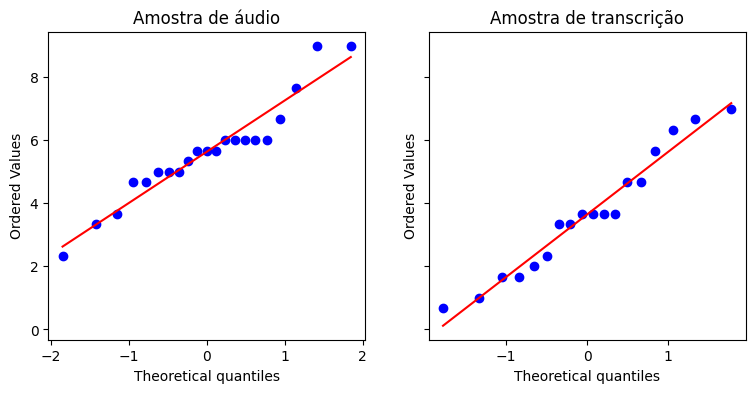

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import scipy
from scipy.stats import norm

data = pd.read_csv("./SchroederEpley2015data.txt")
dataSa = data.loc[data["CONDITION"] == 1, "Intellect_Rating"]
dataSt = data.loc[data["CONDITION"] == 0, "Intellect_Rating"]

Sa = dataSa.values
St = dataSt.values

f, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(9, 4), sharey=True)
scipy.stats.probplot(Sa, dist = "norm", plot = ax1)
ax1.set_title("Amostra de áudio")
scipy.stats.probplot(St, dist = "norm", plot = ax2)
ax2.set_title("Amostra de transcrição")
pyplot.show()

**Explicação do código:**
* A imagem do gráfico foi divida em duas usando pyploy.subplots da bibliotéca matplotlib

* O teste de normalidade foi calculado usando scipy.stats.probplot da bibliotéca scipy

**Resposta**
Ambas as amostras seguem a distribuição normal, pois os pontos em azul estão se localizando aproximadamente sobre a reta vermelha. 



(iv) Construa um intervalo de confiança para a média de avaliações produzidas por duas populações distintas, a de recrutadores que ouvem os áudios, e a de recrutadores que leem os transcritos. Note que a resposta a este item deve ser dois intervalos de confiança. Use o nível de confiança de 95%.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import scipy
from scipy.stats import norm

data = pd.read_csv("./SchroederEpley2015data.txt")
dataSa = data.loc[data["CONDITION"] == 1, "Intellect_Rating"]
dataSt = data.loc[data["CONDITION"] == 0, "Intellect_Rating"]

Sa = dataSa.values
St = dataSt.values

mean_Sa = np.mean(Sa)
std_Sa = np.std(Sa, ddof=1)
n_Sa = len(Sa)

z_score = np.abs(norm.ppf((1 - 0.95)/2))

error_margin_Sa = z_score * std_Sa/np.sqrt(n_Sa)
ic_Sa_1 = mean_Sa - error_margin_Sa
ic_Sa_2 = mean_Sa + error_margin_Sa
print()
print("Amostra de audio -> IC de 95 porcento: (%.5f, %.5f)" % (ic_Sa_1, ic_Sa_2))

mean_St = np.mean(St)
std_St = np.std(St, ddof=1)
n_St = len(St)

error_margin_St = z_score * std_St/np.sqrt(n_St)
ic_St_1 = mean_St - error_margin_St
ic_St_2 = mean_St + error_margin_St
print("Amostra de trascricao -> IC de 95 porcento: (%.5f, %.5f)" % (ic_St_1, ic_St_2))


Amostra de audio -> IC de 95 porcento: (4.94689, 6.32295)
Amostra de trascricao -> IC de 95 porcento: (2.76517, 4.53113)


**Explicação do código:**
* mean_Sa e means_St recebem as médias das amostras Sa e St respectivamente
* std_Sa e std_St recebem os desvios padrões das amostras Sa e St respectivamente
* n_Sa e n_St recebem os tamanhos das amostras Sa e St respetivamente
* z_score armazena o score. Para o calculo do z_score foi usado o método norm.ppf da bibliotéca scipy.stats.
* error_margin_Sa e error_margin_St recebem o calculo das margens de erros
* ic_Sa_1 e ic_Sa2 recebem os extermos do intervalo de confiança da amostra Sa
* ic_St_1 e ic_St2 recebem os extermos do intervalo de confiança da amostra St


(v) Com base nos intervalos de confiança obtidos no item anterior, você
acha que a conclusão a que chegaram os autores em Schroeder and
Epley (2015) é válida? Justifique sua resposta.

**Falta Resposta!!**



# 4 Intervalo de confiança para µ

Essa parte do trabalho envolve computar um intervalo de confiança para a
média das alturas dos estudantes de uma universidade. Você deve realizar
essa parte do trabalho usando como amostra os dados contidos no conjunto
de dados fornecido no arquivo survey.csv. Esse conjunto de dados contém
o resultado de uma pesquisa feita com uma amostra de estudantes em uma
universidade australiana. Os atributos desse conjunto de dados são descritos
a seguir.

Sex. O sexo do aluno. (Fator com os níveis Male e Female.)
* Wr.Hnd. vão (distância da ponta do polegar à ponta do dedo mínimo
da mão aberta) da mão que escreve, em centímetros.
* NW.Hnd. extensão da mão que não escreve.
* W.Hnd. mão de escrita. (Left ou Right.)
* Fold. ”Cruze os braços! Qual está no topo? (R on L, L on R, Neither.)
* Pulse. taxa de pulso do aluno (batimentos por minuto).
* Clap. ’Bata palmas! Qual mão está para cima? (Right, Left,None.)
* Exer. quantas vezes o aluno se exercita. (Freq (frequentemente), Some,
None.)
* Smoke. Quanto o aluno fuma. (Heavy, Regul (regularmente), Occas
(occasionalmente), Never.)
* Height. altura do aluno em centímetros.
* M.I. se o aluno expressou a altura em unidades imperiais (pés/polegadas)
ou métricas (centímetros/metros). (Metric, Imperial.)
* Age. Idade do aluno em anos

A variável de interesse está na coluna Height do conjunto de dados. Inicialmente, você deve eliminar valores faltantes (missing values) nessa coluna.
Para isso, pesquise sobre a função na.omit da linguagem R, ou sobre a
função drop.na da biblioteca Pandas em Python.
Agora, realize o que se pede a seguir.


(i) Usando a distribuição t de Student, calcule um intervalo de confiança
no nível de 95% para a altura média dos estudantes da universidade.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm

data = pd.read_csv("./survey.csv")
data_heights = data["Height"].dropna()
heights = data_heights.values

n = len(heights)
mean = np.mean(heights)
std = np.std(heights, ddof = 1)

df = n - 1
t_score = np.abs(t.ppf((1 - 0.95)/2, df))
error_margin = t_score * std/np.sqrt(n)
print("IC de 95 porcento: (%.5f, %.5f)" % (mean - error_margin, mean + error_margin))

IC de 95 porcento: (171.03798, 173.72374)


**Explicação do código:**
* data recebe o arquivo survey.csv
* data_heights tem todas as alturas não nulas. Para eliminar os valores nulos foi utilizado o método dropna().
* heights tem um array das alturas 
* n tem o tamanho do array armazenado em heights
* mean recebe o valor da média dos valores contidos em heights
* std recebe o valor do desvio padrão da amostra contida em heights
* df tem o valor do graus de liberdade
* t_score recebe o valor do score da distribuição t
* error_margin recebe o calculo da margem de erro
* print exibe na tela os extremos do intervalo de confiança: mean - error_margin e mean + error_margin

(ii) Construa outro intervalo de confiança, desta vez usando o z-score (em
vez do t-score que você usou anteriormente).

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm

data = pd.read_csv("./survey.csv")
data_heights = data["Height"].dropna()
heights = data_heights.values

n = len(heights)
mean = np.mean(heights)
std = np.std(heights, ddof = 1)

z_score = np.abs(norm.ppf((1 - 0.95)/2))
error_margin = z_score * std/np.sqrt(n)
print("IC de 95 porcento: (%.5f, %.5f)" % (mean - error_margin, mean + error_margin))

IC de 95 porcento: (171.04580, 173.71593)


**Explicação do código:**
* data recebe o arquivo survey.csv
* data_heights tem todas as alturas não nulas. Para eliminar os valores nulos foi utilizado o método dropna().
* heights tem um array das alturas
* n tem o tamanho do array armazenado em heights
* mean recebe o valor da média dos valores contidos em heights
* std recebe o valor do desvio padrão da amostra contida em heights
* z_score recebe o valor do score da distribuição normal
* error_margin recebe o calculo da margem de erro
* print exibe na tela os extremos do intervalo de confiança: mean - error_margin e mean + error_margin

(iii) Apresente uma análise comparativa dos dois intervalos de confiança
obtidos.

**Resposta:**

Intervalo de confiança usando a distribuição t: ic 95% (171.03798, 173.72374)
Intervalo de confiança usando z-score: IC de 95% porcento: (171.04580, 173.71593)

Como o tamanho da amostra é maior que 30, então o intervalo de confiança usando a distribuição t tem valores bem próximos do intervalo de confiança usando o z-score. 

5 Intervalo de confiança para $\rho$

Nesta parte do trabalho, você deve considerar a mesma amostra contida
no conjunto de dados survey. Dessa vez, você produzir um intervalo de
confiança, no nível de 90%, para a proporção de alunos da universidade que
são canhotos. Sendo assim, dessa vez a coluna de interesse é W.Hnd.


(i) Primeiramente, se certifique de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que você possa
realizar a construção do intervalo de confiança de forma satisfatória.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

data = pd.read_csv("./survey.csv")
data_W_Hnd = data["W.Hnd"]
data_left = data.loc[data["W.Hnd"] == "Left", "W.Hnd"].values
data_right = data.loc[data["W.Hnd"] == "Right", "W.Hnd"].values

print("Num. de canhotos:", len(data_left))
print("Num. de destros:", len(data_right))

Num. de canhotos: 18
Num. de destros: 218


**Explicação do código:**
* data recebe o arquivo survey.csv
* data_W_Hnd recebe os valores da coluna W.Hnd
* data_left recebe os valores das pessoas conhotas da coluna W.Hnd
* data_right recebe os valores das pessoas destras de coluna W.Hnd
* dentro dos prints foi usado o método len(data_left) e len(data_right) para contabilizar a quantidade destros e conhotos

**Resposta:**

Num. de canhotos: 18

Num. de destros: 218

(ii) Produza o intervalo de confiança solicitado. Junto com o resultado,
forneça também uma análise.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

data = pd.read_csv("./survey.csv")
data_W_Hnd = data["W.Hnd"]
data_left = data.loc[data["W.Hnd"] == "Left", "W.Hnd"].values
data_right = data.loc[data["W.Hnd"] == "Right", "W.Hnd"].values

n_left = len(data_left)
n_tot = len(data_W_Hnd.values)

pHat = n_left/n_tot
z_score = np.absolute(norm.ppf((1 - 0.90)/2))
error_margin = z_score * np.sqrt((pHat * (1 - pHat))/n_tot)
print("IC de 90 porcento: (%.5f, %.5f)" % (pHat - error_margin, pHat + error_margin))


IC de 90 porcento: (0.04764, 0.10425)


**Explicação do código:**
* n_left armazena a quantidade de canhotos de data_left
* n_tot armazena a quantidade total de data_W_Hnd
* pHat recebe o calculo da proporção da amostra
* z_score recebe o score da distribuição normal
* error_margin recebe o calculo da margem de erro
* print exibe os extremos do intervalo de confiança para proporção. Onde pHat - error_margin é o extermo inferior e pHat + error_margin é o extremo superior.

**Resposta:**
Seguindo o intervalo de confiaça, a proporção populacional de alunos canhotos estará no intervalo de 0.04764 e 0.10425 com 90% de confiança. 